Reference: https://github.com/enakai00/jupyter_tfbook

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Least squares

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 $$

$$ E = \frac{1}{2} \sum_{n=1}^{12} (y_n - t_n)^2 $$

$$ y_n = w_0 + w_1 n + w_2 n^2 + w_3 n^3 + w_4 n^4 = \sum_{m=0}^{4} w_m n^m$$

$$ E(w_0, w_1, w_2, w_3, w_4) = \frac{1}{2} \sum_{n=1}^{12} (\sum_{m=0}^{4} w_m n^m - t_n)^2 $$

$$
y_n = 
    \begin{pmatrix}
      n^0 n^1 n^2 n^3 n^4
    \end{pmatrix}
    \times
    \begin{pmatrix}
      w_0 \\
      w_1 \\
      w_2 \\
      w_3 \\
      w_4 \\
    \end{pmatrix}
$$

A matrix of every month in a year

$$
\boldsymbol{X} =
\begin{pmatrix}
      1^0 & 1^1 & 1^2 & 1^3 & 1^4\\
      2^0 & 2^1 & 2^2 & 2^3 & 2^4\\
      \vdots \\
      12^0 & 12^1 & 12^2 & 12^3 & 12^4
    \end{pmatrix}
$$

In [16]:
x = tf.placeholder(tf.float32, [None, 5])

$$
\boldsymbol{w} =
    \begin{pmatrix}
      w_0 \\
      w_1 \\
      w_2 \\
      w_3 \\
      w_4 \\
    \end{pmatrix}
$$

In [17]:
w = tf.Variable(tf.zeros([5, 1]))

$$
\boldsymbol{y} =
    \begin{pmatrix}
      y_1 \\
      y_2 \\
      \vdots \\
      y_{12}
    \end{pmatrix}
$$

$$ \boldsymbol{y} = \boldsymbol{X} \boldsymbol{w}$$

In [18]:
y = tf.matmul(x, w)

Temperature average every month

$$
\boldsymbol{t} =
    \begin{pmatrix}
      t_1 \\
      t_2 \\
      \vdots \\
      t_{12}
    \end{pmatrix}
$$

In [19]:
t = tf.placeholder(tf.float32, [None, 1])

$$ E = \frac{1}{2}reduce\_sum(square(\boldsymbol{y}-\boldsymbol{t})) $$

In [20]:
loss = tf.reduce_sum(tf.square(y-t))

In [21]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [22]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: {}, Loss: {}'.format(i, loss_val))

Step: 10000, Loss: 31.012832641601562
Step: 20000, Loss: 29.292377471923828
Step: 30000, Loss: 28.031116485595703
Step: 40000, Loss: 27.911422729492188
Step: 50000, Loss: 25.769744873046875
Step: 60000, Loss: 24.764514923095703
Step: 70000, Loss: 23.839672088623047
Step: 80000, Loss: 22.97088050842285
Step: 90000, Loss: 22.467998504638672
Step: 100000, Loss: 21.445119857788086


In [25]:
w_val = sess.run(w)
print(w_val)

[[ 3.7658305 ]
 [-1.5907954 ]
 [ 1.7854367 ]
 [-0.20124646]
 [ 0.00536682]]


In [26]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

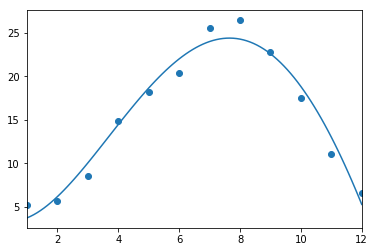

In [27]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
linex = np.linspace(1, 12, 100)
liney = predict(linex)
subplot.plot(linex, liney)